<a href="https://colab.research.google.com/github/Giovannacm/nature-inspired-computing/blob/main/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Estadual Paulista - UNESP

Programa de Pós-Graduação em Ciência da Computação

Disciplina: **Computação Inspirada pela Natureza** - Professor Fabricio Breve

**Trabalho 2** - Giovanna Carreira Marinho

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import random
import scipy.stats as stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Atividade perceptron

In [ ]:
class Perceptron:
    
    def __init__(self, tamanho_entrada, taxa_aprendizado):
        self.pesos = np.zeros(tamanho_entrada + 1)
        self.taxa_aprendizado = taxa_aprendizado

    def getPesos(self):
      return self.pesos
    
    def prever(self, entrada): #Função de ativação (sinal)
        soma_ponderada = np.dot(entrada, self.pesos[1:]) + self.pesos[0]  #Calculando a soma ponderada (a primeira posição é o viés, b)
        if soma_ponderada > 0:
            return 1
        else:
            return 0
    
    def treinar(self, entradas, saidas): #Método para treinamento do Perceptron, onde são ajustados seus pesos
        iteracao = 1
        continua = True
        
        while continua: #Esse loop é feito até que o erro seja 0 para todos os elementos do conjunto de treinamento
            print("\nIteração: ", iteracao)
            erros = []  #Inicializando uma lista de erros para verificar a convergência, no final da iteração
            
            for entrada, saida in zip(entradas, saidas):  #Iterando sobre cada par entrada/saida do conjunto de treinamento
                saida_obtida = self.prever(entrada) #Aplicando a função de ativação para a entrada de modo a obter uma suposta saída
                
                erro = saida - saida_obtida  #Calculando o erro do valor desejado com o obtido
                erros.append(erro) #Inserindo o erro em uma lista de erros

                #self.pesos[1:] += self.taxa_aprendizado * erro * entrada #Atualizando o vetor de pesos seguindo a regra w(t+1) = w(t) + taxa_apend*erro*x(t)
                for peso_i in range(len(self.pesos[1:])):
                  self.pesos[peso_i + 1] += self.taxa_aprendizado * erro * entrada[peso_i]
                self.pesos[0] += self.taxa_aprendizado * erro  #Atualizando o viés
                
                print("   Erro: ", erro, " | Pesos: ", self.pesos)
                
            continua = False
            for erro in erros: #Verificando se existem erros diferentes de 0 para saber se o método convergiu ou não
                if erro != 0: #Ainda existem erros em algum conjunto de treinamento
                    continua = True #Então, ainda deve ser feita mais uma iteração
            
            iteracao += 1

In [ ]:
X_treino = [[1, 1, 0, 1],
            [0, 0, 1, 0],
            [1, 1, 0, 0],
            [1, 0, 1, 1],
            [1, 0, 0, 1],
            [0, 0, 1, 1]]

y_treino = np.array([1, 0, 0, 1, 0, 1])

taxa_aprendizado = 0.5

In [ ]:
perceptron = Perceptron(4, taxa_aprendizado)
perceptron.treinar(X_treino, y_treino)


Iteração:  1
   Erro:  1  | Pesos:  [0.5 0.5 0.5 0.  0.5]
   Erro:  -1  | Pesos:  [ 0.   0.5  0.5 -0.5  0.5]
   Erro:  -1  | Pesos:  [-0.5  0.   0.  -0.5  0.5]
   Erro:  1  | Pesos:  [0.  0.5 0.  0.  1. ]
   Erro:  -1  | Pesos:  [-0.5  0.   0.   0.   0.5]
   Erro:  1  | Pesos:  [0.  0.  0.  0.5 1. ]

Iteração:  2
   Erro:  0  | Pesos:  [0.  0.  0.  0.5 1. ]
   Erro:  -1  | Pesos:  [-0.5  0.   0.   0.   1. ]
   Erro:  0  | Pesos:  [-0.5  0.   0.   0.   1. ]
   Erro:  0  | Pesos:  [-0.5  0.   0.   0.   1. ]
   Erro:  -1  | Pesos:  [-1.  -0.5  0.   0.   0.5]
   Erro:  1  | Pesos:  [-0.5 -0.5  0.   0.5  1. ]

Iteração:  3
   Erro:  1  | Pesos:  [0.  0.  0.5 0.5 1.5]
   Erro:  -1  | Pesos:  [-0.5  0.   0.5  0.   1.5]
   Erro:  0  | Pesos:  [-0.5  0.   0.5  0.   1.5]
   Erro:  0  | Pesos:  [-0.5  0.   0.5  0.   1.5]
   Erro:  -1  | Pesos:  [-1.  -0.5  0.5  0.   1. ]
   Erro:  1  | Pesos:  [-0.5 -0.5  0.5  0.5  1.5]

Iteração:  4
   Erro:  0  | Pesos:  [-0.5 -0.5  0.5  0.5  1.5]
   Erro:  0 

In [ ]:
print('Pesos finais:', perceptron.getPesos())

Pesos finais: [-1.  -1.   1.   1.   1.5]


In [ ]:
dic_diagnostico = {0: 'saudável',
                   1: 'doente'}

In [ ]:
X_teste_luis = np.array([0, 0, 0, 1])
dic_diagnostico[perceptron.prever(X_teste_luis)]

'doente'

In [ ]:
X_teste_laura = np.array([1, 1, 1, 1])
dic_diagnostico[perceptron.prever(X_teste_laura)]

'doente'

# Rede perceptron

In [2]:
def mediaGeometrica(x, y):
	return int(math.sqrt(x * y))

def logistica(x):
  return 1 / (1 + math.exp(-x))

def dLogisticaDx(x):
    return math.exp(-x) / ((1 + math.exp(-x))*(1 + math.exp(-x)))

In [3]:
class RedePerceptronBackpropagation:
    
    def __init__(self, taxaAprendizado, pesoInicial, quantidadeClasses, quantidadeNeuroniosCamadaEntrada, quantidadeNeuroniosCamadaOculta, quantidadeNeuroniosCamadaSaida):
      self.taxaAprendizado = taxaAprendizado
      self.quantidadeNeuroniosCamadaEntrada = quantidadeNeuroniosCamadaEntrada
      self.quantidadeNeuroniosCamadaOculta = quantidadeNeuroniosCamadaOculta
      self.quantidadeNeuroniosCamadaSaida = quantidadeNeuroniosCamadaSaida
      self.quantidadeClasses = quantidadeClasses
      #Inicializando os pesos da camada oculta com valores aleatórios entre os valores solicitados com 5 casas decimais
      self.pesosCamadaOculta = [[round(random.uniform(pesoInicial[0], pesoInicial[1]), 5) for i in range(quantidadeNeuroniosCamadaEntrada)] for j in range(quantidadeNeuroniosCamadaOculta)]
      #Inicializando os pesos da camada de saída com valores aleatórios entre os valores solicitados com 5 casas decimais
      self.pesosCamadaSaida = [[round(random.uniform(pesoInicial[0], pesoInicial[1]), 5) for i in range(quantidadeNeuroniosCamadaOculta)] for j in range(quantidadeNeuroniosCamadaSaida)]
      self.netCamadaOculta = [0 for i in range(quantidadeNeuroniosCamadaOculta)]
      self.netCamadaSaida = [0 for i in range(quantidadeNeuroniosCamadaSaida)]
      self.saidaCamadaOculta = [0 for i in range(quantidadeNeuroniosCamadaOculta)]
      self.saidaCamadaSaida = [0 for i in range(quantidadeNeuroniosCamadaSaida)]
      self.errosCamadaOculta = [0 for i in range(quantidadeNeuroniosCamadaOculta)]
      self.errosCamadaSaida = [0 for i in range(quantidadeNeuroniosCamadaSaida)]
      self.dadosTreinamentoRede = []

    def getPesosCamadaOculta(self):
      return self.pesosCamadaOculta
    
    def getPesosCamadaSaida(self):
      return self.pesosCamadaSaida

    def calculaNetsCamadaOculta(self, entradas):	#Calcula os nets da camada oculta
      for j in range(0, self.quantidadeNeuroniosCamadaOculta):
        net = 0
        for i in range(0, self.quantidadeNeuroniosCamadaEntrada):
          net += self.pesosCamadaOculta[j][i] * entradas[i]
        self.netCamadaOculta[j] = net

    def aplicaFuncaoTransferenciaCamadaOculta(self): #Aplica função de transferencia na camada oculta
      for j in range(0, self.quantidadeNeuroniosCamadaOculta):
        self.saidaCamadaOculta[j] = logistica(self.netCamadaOculta[j])

    def calculaNetsCamadaSaida(self, entradas):	    #Calcula os nets da camada de saída
      for j in range(0, self.quantidadeNeuroniosCamadaSaida):
        net = 0
        for i in range(0, self.quantidadeNeuroniosCamadaOculta):
          net += self.pesosCamadaSaida[j][i] * self.saidaCamadaOculta[i]
        self.netCamadaSaida[j] = net

    def aplicaFuncaoTransferenciaCamadaSaida(self): #Aplica função de transferencia na camada de saída
      for j in range(0, self.quantidadeNeuroniosCamadaSaida):
        self.saidaCamadaSaida[j] = logistica(self.netCamadaSaida[j])

    def calculaErrosCamadaSaida(self, saida): #Calcula os erros da camada de saída
      desejado = saida
      
      desejados = [0 for i in range(0, self.quantidadeNeuroniosCamadaSaida)]
      desejados[desejado-1] = 1

      for j in range(0, self.quantidadeNeuroniosCamadaSaida):
        self.errosCamadaSaida[j] = (desejados[j] - self.saidaCamadaSaida[j])*dLogisticaDx(self.netCamadaSaida[j])

    def calculaErrosCamadaOculta(self): #Calcula os erros da camada oculta
      for j in range(0, self.quantidadeNeuroniosCamadaOculta):
        somatorio = 0
        for i in range(0, self.quantidadeNeuroniosCamadaSaida):
          somatorio += self.errosCamadaSaida[i]*self.pesosCamadaSaida[i][j]
        self.errosCamadaOculta[j] = dLogisticaDx(self.netCamadaOculta[j])*somatorio

    def atualizaPesosCamadaSaida(self): #Atualiza  os pesos da camada de saída
      for i in range(0, self.quantidadeNeuroniosCamadaSaida):
        for j in range(0, self.quantidadeNeuroniosCamadaOculta):
          self.pesosCamadaSaida[i][j] += self.taxaAprendizado * self.errosCamadaSaida[i] * self.saidaCamadaOculta[j]

    def atualizaPesosCamadaOculta(self, entradas): #Atualiza  os pesos da camada oculta
      for i in range(0, self.quantidadeNeuroniosCamadaOculta):
        for j in range(0, self.quantidadeNeuroniosCamadaEntrada):
          self.pesosCamadaOculta[i][j] += self.taxaAprendizado * self.errosCamadaOculta[i] * entradas[j]

    def calculaErroRede(self): #Calcula o erro da rede
      somatorio = 0
      for k in range(0, self.quantidadeNeuroniosCamadaSaida):
        somatorio += (self.errosCamadaSaida[k] * self.errosCamadaSaida[k])
      return somatorio/2

    def treinar(self, entradas, saidas, maxIteracao, minErro, entradasVal, saidasVal, printInfo=True): #Realiza os 9 passos necessários para fazer o treinamento sobre as amostras
      iteracao = 0
      erro_iteracao = np.inf
      continua = True
      dadosTreinamento = {'erroRede': [], 'mseTre': [], 'mseVal': []}

      while continua: 
        saidasObtidasTreinamento = []

        for i in range(len(entradas)):
          self.calculaNetsCamadaOculta(entradas[i])
          self.aplicaFuncaoTransferenciaCamadaOculta()
          self.calculaNetsCamadaSaida(entradas[i])
          self.aplicaFuncaoTransferenciaCamadaSaida()
          self.calculaErrosCamadaSaida(saidas[i])
          self.calculaErrosCamadaOculta()
          self.atualizaPesosCamadaSaida()
          self.atualizaPesosCamadaOculta(entradas[i])
          saidasObtidasTreinamento.append(self.verificaSaidaObtida())

        erro_iteracao = self.calculaErroRede()
        
        mseTre = mean_squared_error(saidas, saidasObtidasTreinamento, squared=True)
        _, saidasObtidasVal = self.teste(entradasVal, saidasVal)
        mseVal = mean_squared_error(saidasVal, saidasObtidasVal, squared=True)

        dadosTreinamento['erroRede'].append(erro_iteracao)
        dadosTreinamento['mseTre'].append(mseTre)
        dadosTreinamento['mseVal'].append(mseVal)

        if printInfo:
          print('\n-> Iteração:', iteracao, '|', 'Erro da rede:', erro_iteracao)
          print('   MSE treinamento:', mseTre, '| MSE validação:', mseVal)

        iteracao += 1
        if maxIteracao:
          continua = True if iteracao < maxIteracao else False
        if minErro:
          continua = True if erro_iteracao > minErro and continua else False

      return dadosTreinamento

    def verificaSaidaObtida(self): #Verifica a classe obtida
      maior = 0

      for i in range(1, self.quantidadeNeuroniosCamadaSaida): #Pegando o primeiro maior
        if self.saidaCamadaSaida[i] > self.saidaCamadaSaida[maior]:
          maior = i

      maior += 1
      if maior == self.quantidadeClasses:
        maior = 0
      return maior

    def atualizaMatrizConfusao(self, matrizConfusao, saida): #Alterando os valores obtidos de acordo com a função utilizada e atualizar a matriz de confusão
      desejado = saida
      maior = self.verificaSaidaObtida()
      matrizConfusao[maior][desejado] += 1 #linha: obtido (primeiro maior), coluna: desejado
      return maior

    def teste(self, entradas, saidas): #Realiza os passos para teste sobre as amostras
      matrizConfusao = [[0 for i in range(self.quantidadeClasses)] for j in range(self.quantidadeClasses)]
      saidasObtidas = []

      for i in range(len(entradas)):
        self.calculaNetsCamadaOculta(entradas[i])
        self.aplicaFuncaoTransferenciaCamadaOculta()
        self.calculaNetsCamadaSaida(entradas[i])
        self.aplicaFuncaoTransferenciaCamadaSaida()
        pred = self.atualizaMatrizConfusao(matrizConfusao, saidas[i])
        saidasObtidas.append(pred)

      return matrizConfusao, saidasObtidas

In [4]:
def treinarRede(entradas, saidas, entradasVal, saidasVal, taxaAprendizado, pesoInicial, maxIteracao, minErro, printInfo=True):
  quantidadeClasses = len(np.unique(saidas))
  quantidadeNeuroniosCamadaEntrada = len(entradas[0])
  quantidadeNeuroniosCamadaSaida = quantidadeClasses
  quantidadeNeuroniosCamadaOculta = mediaGeometrica(quantidadeNeuroniosCamadaEntrada, quantidadeNeuroniosCamadaSaida)

  rede = RedePerceptronBackpropagation(taxaAprendizado, pesoInicial, quantidadeClasses, quantidadeNeuroniosCamadaEntrada, quantidadeNeuroniosCamadaOculta, quantidadeNeuroniosCamadaSaida)
  
  dadosTreinamento = rede.treinar(entradas, saidas, maxIteracao, minErro, entradasVal, saidasVal, printInfo)

  return rede, dadosTreinamento

In [5]:
def classificarDados(rede, entradas, saidas):
  matrizConfusao, saidasObtidas = rede.teste(entradas, saidas)
  mse = mean_squared_error(saidas, saidasObtidas, squared=True)
  return matrizConfusao, mse

In [6]:
def rodaConfiguracoes(entradas, saidas, entradasVal, saidasVal, entradasTeste, saidasTeste, pesoInicial, maxIteracao, minErro, quantidadeExecucao=500, printTreinInfo=True):
  taxasApendizado = [0.0001, 0.001, 0.01]
  cor = ['red', 'blue', 'green']

  for i in range(len(taxasApendizado)):
    erroRede = []
    mseFinalTreinamento = []
    mseFinalValidacao = []
    mseFinalTeste = []

    for iteracao in range(quantidadeExecucao):
      rede, dadosTreinamento = treinarRede(entradas, saidas, entradasVal, saidasVal, taxasApendizado[i], pesoInicial, maxIteracao, minErro, printTreinInfo)
      matrizConfusao, mseTest = classificarDados(rede, entradasTeste, saidasTeste)

      erroRede.append(dadosTreinamento['erroRede'][-1])
      mseFinalTreinamento.append(dadosTreinamento['mseTre'][-1])
      mseFinalValidacao.append(dadosTreinamento['mseVal'][-1])
      mseFinalTeste.append(mseTest)

    mediaErroRede = np.mean(erroRede)
    mediaMseTreinamento = np.mean(mseFinalTreinamento)
    mediaMseValidacao = np.mean(mseFinalValidacao)
    mediaMseTeste = np.mean(mseFinalTeste)

    print('\nTaxa de aprendizado:', taxasApendizado[i])
    print(' -> Erro da rede (avg):', round(mediaErroRede, 6))
    print(' -> MSE treinamento (avg):', round(mediaMseTreinamento, 6))
    print(' -> MSE validação (avg):', round(mediaMseValidacao, 6))
    print(' -> MSE teste (avg):', round(mediaMseTeste, 6))

# Iris data set

## Leitura do conjunto de dados

In [8]:
iris = datasets.load_iris()

In [9]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [10]:
print('Atributos:', iris['feature_names'])

Atributos: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
X = iris['data']
y = iris['target']

In [12]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [13]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
#df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#sns.pairplot(df, hue="target", palette="tab10")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(105, 4)
(22, 4)
(23, 4)


In [17]:
X_train[:10]

array([[5.2, 2.7, 3.9, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [4.9, 2.5, 4.5, 1.7],
       [7.1, 3. , 5.9, 2.1],
       [4.4, 3.2, 1.3, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [5.8, 2.8, 5.1, 2.4]])

In [18]:
y_train[:10]

array([1, 0, 2, 2, 0, 1, 2, 2, 1, 2])

In [19]:
X_test[:10]

array([[4.6, 3.2, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.5, 2.3, 4. , 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [6.7, 3. , 5. , 1.7],
       [4.9, 3.6, 1.4, 0.1],
       [5.6, 3. , 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 2.9, 5.6, 1.8]])

In [20]:
y_test[:10]

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 2])

In [21]:
X_val[:10]

array([[5.1, 3.8, 1.5, 0.3],
       [5.2, 3.4, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.6, 2.7, 4.2, 1.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.4, 3.1, 5.5, 1.8],
       [6.7, 3. , 5.2, 2.3],
       [7.7, 2.8, 6.7, 2. ],
       [6.9, 3.1, 5.4, 2.1],
       [5.4, 3.9, 1.3, 0.4]])

In [22]:
y_val[:10]

array([0, 0, 0, 1, 0, 2, 2, 2, 2, 0])

## Treinamento da rede e classificação dos dados de teste

### Teste 1

In [ ]:
rede_iris, dadosTreinamento_iris = treinarRede(X_train, y_train, X_val, y_val, taxaAprendizado=0.01, pesoInicial=(-0.1, 0.1), maxIteracao=1000, minErro=None)


-> Iteração: 0 | Erro da rede: 0.022589442963079232
   MSE treinamento: 1.6571428571428573 | MSE validação: 1.8695652173913044

-> Iteração: 1 | Erro da rede: 0.022419230591611397
   MSE treinamento: 1.5714285714285714 | MSE validação: 1.8695652173913044

-> Iteração: 2 | Erro da rede: 0.02223122650882446
   MSE treinamento: 0.7523809523809524 | MSE validação: 0.5217391304347826

-> Iteração: 3 | Erro da rede: 0.022025264406802525
   MSE treinamento: 0.638095238095238 | MSE validação: 0.8695652173913043

-> Iteração: 4 | Erro da rede: 0.021802133695323796
   MSE treinamento: 0.638095238095238 | MSE validação: 0.8695652173913043

-> Iteração: 5 | Erro da rede: 0.02156355857155564
   MSE treinamento: 0.638095238095238 | MSE validação: 0.8695652173913043

-> Iteração: 6 | Erro da rede: 0.021312208565270132
   MSE treinamento: 0.638095238095238 | MSE validação: 0.8695652173913043

-> Iteração: 7 | Erro da rede: 0.02105177806827634
   MSE treinamento: 0.638095238095238 | MSE validação: 0.8

No handles with labels found to put in legend.


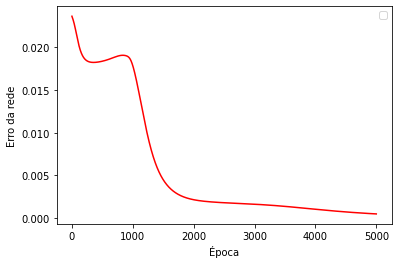

In [ ]:
y = dadosTreinamento_iris
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['erroRede'], 'r')
plt.ylabel("Erro da rede")
plt.xlabel("Época")
plt.legend()

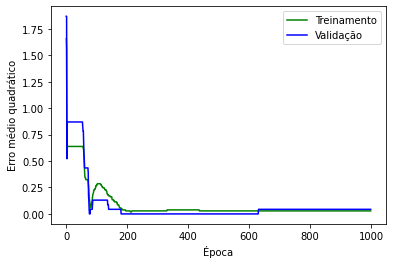

In [ ]:
y = dadosTreinamento_iris
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['mseTre'], 'g-', label='Treinamento')
plt.plot(x, y['mseVal'], 'b-', label='Validação')
plt.ylabel("Erro médio quadrático")
plt.xlabel("Época")
plt.legend()

In [ ]:
matriz_confusao_iris, mse = classificarDados(rede_iris, X_test, y_test)

In [ ]:
matriz_confusao_iris

[[7, 0, 0], [0, 7, 0], [0, 2, 6]]

In [ ]:
mse

0.09090909090909091

### Teste 2

In [ ]:
rede_iris, dadosTreinamento_iris = treinarRede(X_train, y_train, X_val, y_val, taxaAprendizado=0.001, pesoInicial=(-0.1, 0.1), maxIteracao=5000, minErro=None)

A saída de streaming foi truncada nas últimas 5000 linhas.
-> Iteração: 3333 | Erro da rede: 0.0014816569263249792
   MSE treinamento: 0.01904761904761905 | MSE validação: 0.0

-> Iteração: 3334 | Erro da rede: 0.0014811124159451415
   MSE treinamento: 0.01904761904761905 | MSE validação: 0.0

-> Iteração: 3335 | Erro da rede: 0.0014805674164593884
   MSE treinamento: 0.01904761904761905 | MSE validação: 0.0

-> Iteração: 3336 | Erro da rede: 0.001480021928206904
   MSE treinamento: 0.01904761904761905 | MSE validação: 0.0

-> Iteração: 3337 | Erro da rede: 0.0014794759515303593
   MSE treinamento: 0.01904761904761905 | MSE validação: 0.0

-> Iteração: 3338 | Erro da rede: 0.001478929486775936
   MSE treinamento: 0.01904761904761905 | MSE validação: 0.0

-> Iteração: 3339 | Erro da rede: 0.001478382534293332
   MSE treinamento: 0.01904761904761905 | MSE validação: 0.0

-> Iteração: 3340 | Erro da rede: 0.0014778350944357253
   MSE treinamento: 0.01904761904761905 | MSE validação: 0.0



No handles with labels found to put in legend.


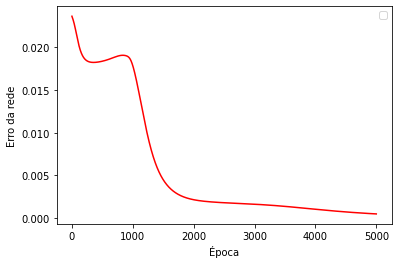

In [ ]:
y = dadosTreinamento_iris
x = np.arange(0, len(y['erroRede']))
plt.plot(x, y['erroRede'], 'r')
plt.ylabel("Erro da rede")
plt.xlabel("Época")
plt.legend()

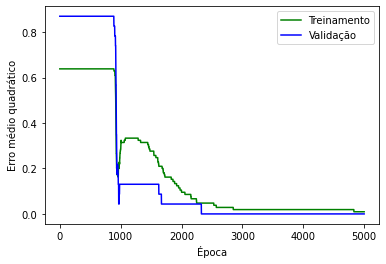

In [ ]:
y = dadosTreinamento_iris
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['mseTre'], 'g-', label='Treinamento')
plt.plot(x, y['mseVal'], 'b-', label='Validação')
plt.ylabel("Erro médio quadrático")
plt.xlabel("Época")
plt.legend()

In [ ]:
matriz_confusao_iris_test, mse_test = classificarDados(rede_iris, X_test, y_test)

In [ ]:
matriz_confusao_iris_test

[[7, 0, 0], [0, 8, 0], [0, 1, 6]]

In [ ]:
mse_test

0.045454545454545456

In [ ]:
matriz_confusao_iris_train, mse_train = classificarDados(rede_iris, X_train, y_train)

In [ ]:
matriz_confusao_iris_train

[[33, 0, 0], [0, 37, 0], [0, 1, 34]]

In [ ]:
mse_train

0.009523809523809525

In [ ]:
matriz_confusao_iris_val, mse_val = classificarDados(rede_iris, X_val, y_val)

In [ ]:
matriz_confusao_iris_val

[[10, 0, 0], [0, 3, 0], [0, 0, 10]]

In [ ]:
mse_val

0.0

## Várias execuções da mesma configuração

In [40]:
rodaConfiguracoes(X_train, y_train, X_val, y_val, X_test, y_test, pesoInicial=(-0.1, 0.1), maxIteracao=700, minErro=None, quantidadeExecucao=30, printTreinInfo=False)


Taxa de aprendizado: 0.0001
 -> Erro da rede (avg): 0.021693
 -> MSE treinamento (avg): 0.902222
 -> MSE validação (avg): 1.049275
 -> MSE teste (avg): 0.960606

Taxa de aprendizado: 0.001
 -> Erro da rede (avg): 0.016113
 -> MSE treinamento (avg): 0.401905
 -> MSE validação (avg): 0.468116
 -> MSE teste (avg): 0.419697

Taxa de aprendizado: 0.01
 -> Erro da rede (avg): 0.000319
 -> MSE treinamento (avg): 0.050159
 -> MSE validação (avg): 0.026087
 -> MSE teste (avg): 0.063636


# Wine data set

## Leitura do conjunto de dados

In [7]:
wine = datasets.load_wine(as_frame=True)

In [8]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [9]:
wine_normed = wine['data'].apply(stats.zscore)

In [10]:
wine_normed

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [11]:
X = np.array(wine_normed.values.tolist()) #wine['data']
y = np.array(wine['target'].values.tolist())

In [12]:
X[:10]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401],
       [ 1.48155459, -0.517366

In [13]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
#df = pd.DataFrame(data= np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['target'])
#sns.pairplot(df, hue="target", palette="tab10")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(124, 13)
(27, 13)
(27, 13)


## Treinamento da rede e classficiação dos dados de teste

### Teste 1

In [ ]:
rede_wine, dadosTreinamento_wine = treinarRede(X_train, y_train, X_val, y_val, taxaAprendizado=0.001, pesoInicial=(-0.1, 0.1), maxIteracao=1500, minErro=None)


-> Iteração: 0 | Erro da rede: 0.023003409129234535
   MSE treinamento: 0.6129032258064516 | MSE validação: 0.5185185185185185

-> Iteração: 1 | Erro da rede: 0.022914608727174803
   MSE treinamento: 0.6129032258064516 | MSE validação: 0.5185185185185185

-> Iteração: 2 | Erro da rede: 0.02282595498351192
   MSE treinamento: 0.6129032258064516 | MSE validação: 0.5185185185185185

-> Iteração: 3 | Erro da rede: 0.022737501041770684
   MSE treinamento: 0.6129032258064516 | MSE validação: 0.5185185185185185

-> Iteração: 4 | Erro da rede: 0.02264929697130532
   MSE treinamento: 0.6129032258064516 | MSE validação: 0.5185185185185185

-> Iteração: 5 | Erro da rede: 0.022561389854047403
   MSE treinamento: 0.6129032258064516 | MSE validação: 0.5185185185185185

-> Iteração: 6 | Erro da rede: 0.022473823874296982
   MSE treinamento: 0.6129032258064516 | MSE validação: 0.5185185185185185

-> Iteração: 7 | Erro da rede: 0.022386640410907686
   MSE treinamento: 0.6129032258064516 | MSE validaçã

No handles with labels found to put in legend.


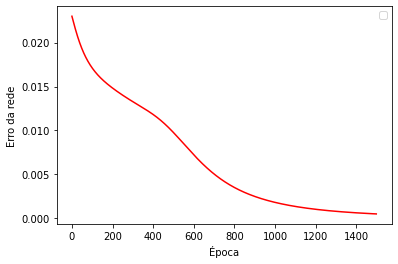

In [ ]:
y = dadosTreinamento_wine
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['erroRede'], 'r')
plt.ylabel("Erro da rede")
plt.xlabel("Época")
plt.legend()

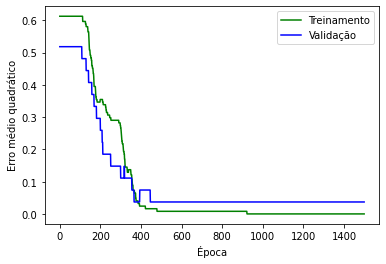

In [ ]:
y = dadosTreinamento_wine
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['mseTre'], 'g-', label='Treinamento')
plt.plot(x, y['mseVal'], 'b-', label='Validação')
plt.ylabel("Erro médio quadrático")
plt.xlabel("Época")
plt.legend()

In [ ]:
matriz_confusao_wine, mse = classificarDados(rede_wine, X_test, y_test)
matriz_confusao_wine

[[7, 0, 0], [0, 10, 1], [0, 0, 9]]

In [ ]:
mse

0.037037037037037035

### Teste 2

In [ ]:
rede_wine, dadosTreinamento_wine = treinarRede(X_train, y_train, X_val, y_val, taxaAprendizado=0.0001, pesoInicial=(-0.1, 0.1), maxIteracao=5000, minErro=None)

A saída de streaming foi truncada nas últimas 5000 linhas.
-> Iteração: 3333 | Erro da rede: 0.01442136715799058
   MSE treinamento: 0.45161290322580644 | MSE validação: 0.37037037037037035

-> Iteração: 3334 | Erro da rede: 0.014420548635330188
   MSE treinamento: 0.45161290322580644 | MSE validação: 0.37037037037037035

-> Iteração: 3335 | Erro da rede: 0.014419730027317107
   MSE treinamento: 0.45161290322580644 | MSE validação: 0.37037037037037035

-> Iteração: 3336 | Erro da rede: 0.01441891133374259
   MSE treinamento: 0.45161290322580644 | MSE validação: 0.37037037037037035

-> Iteração: 3337 | Erro da rede: 0.014418092554398318
   MSE treinamento: 0.45161290322580644 | MSE validação: 0.37037037037037035

-> Iteração: 3338 | Erro da rede: 0.014417273689076426
   MSE treinamento: 0.45161290322580644 | MSE validação: 0.37037037037037035

-> Iteração: 3339 | Erro da rede: 0.014416454737569475
   MSE treinamento: 0.45161290322580644 | MSE validação: 0.37037037037037035

-> Iteração:

No handles with labels found to put in legend.


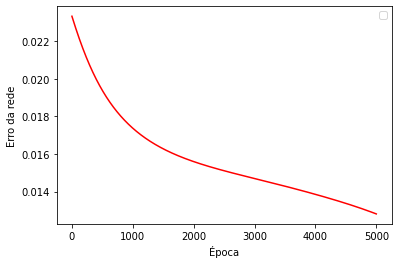

In [ ]:
y = dadosTreinamento_wine
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['erroRede'], 'r')
plt.ylabel("Erro da rede")
plt.xlabel("Época")
plt.legend()

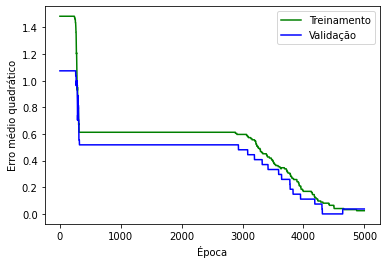

In [ ]:
y = dadosTreinamento_wine
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['mseTre'], 'g-', label='Treinamento')
plt.plot(x, y['mseVal'], 'b-', label='Validação')
plt.ylabel("Erro médio quadrático")
plt.xlabel("Época")
plt.legend()

In [ ]:
matriz_confusao_wine_test, mse_test = classificarDados(rede_wine, X_test, y_test)
matriz_confusao_wine_test

[[7, 2, 0], [0, 8, 0], [0, 0, 10]]

In [ ]:
mse_test

0.1111111111111111

In [ ]:
matriz_confusao_wine_train, mse_train = classificarDados(rede_wine, X_train, y_train)

In [ ]:
matriz_confusao_wine_train

[[41, 1, 0], [1, 47, 1], [0, 0, 33]]

In [ ]:
mse_train

0.024193548387096774

In [ ]:
matriz_confusao_wine_val, mse_val = classificarDados(rede_wine, X_val, y_val)

In [ ]:
matriz_confusao_wine_val

[[10, 0, 0], [0, 12, 0], [0, 1, 4]]

In [ ]:
mse_val

0.037037037037037035

## Várias execuções da mesma configuração

In [17]:
rodaConfiguracoes(X_train, y_train, X_val, y_val, X_test, y_test, pesoInicial=(-0.1, 0.1), maxIteracao=900, minErro=None, quantidadeExecucao=30, printTreinInfo=False)


Taxa de aprendizado: 0.0001
 -> Erro da rede (avg): 0.016419
 -> MSE treinamento (avg): 0.580645
 -> MSE validação (avg): 0.592593
 -> MSE teste (avg): 0.703704

Taxa de aprendizado: 0.001
 -> Erro da rede (avg): 0.005357
 -> MSE treinamento (avg): 0.002419
 -> MSE validação (avg): 0.025926
 -> MSE teste (avg): 0.038272

Taxa de aprendizado: 0.01
 -> Erro da rede (avg): 3.4e-05
 -> MSE treinamento (avg): 0.0
 -> MSE validação (avg): 0.037037
 -> MSE teste (avg): 0.019753


# Multilayer perceptron para classificação de imagens

Os exemplos anteriores apresentaram a classificação de um conjunto de dados em formato numérico utilizando uma rede Perceptron. O exemplo a seguir usa uma rede perceptron com outras camadas, por meio do pacote Keras, para classificação de dados em formado de imagem.

In [ ]:
import tensorflow as tf
from tensorflow import keras

Download do data set fashion MNIST, que possui 70.000 imagens em tons de cinza com dimensões 28 x 28 pixels e 10 classes. Cada imagem representa um item de roupa (como será visto a seguir).

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.min()

0

In [ ]:
X_train_full.max()

255

A função já retorna o conjunto de dados dividido em conjunto de treinamento e teste. Uma vez que os dados encontram-se no intervalo [0, 255] e será utilizada uma rede neural usando gradiente descendente, é necessário normalizar os dados para o intervalo [0, 1]. Isso pode ser feito facilmente dividindo-os por 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

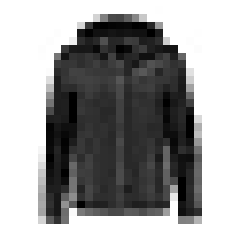

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Como visto na linha anterior as 10 classes do problema são valores entre 0-9, e seus respectivos nomes são:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

O código a seguir é responsável por mostrar algumas amostras do conjunto de dados:

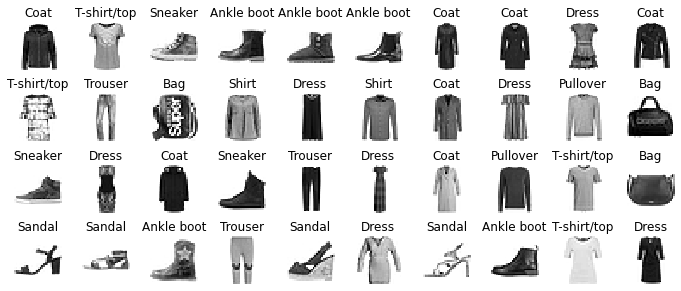

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Criando o modelo com duas camadas ocultas:

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

O código acima cria um modelo chamado Sequential. Esse é um tipo de modelo de rede neural disponibilizado pelo pacote do keras e é composto por uma única pilha de camadas conectadas sequencialmente. Em seguida é acrescentado uma camada do tipo Flatten. Essa camada é responsável por converter cada imagem de entrada em um array 1D. O método recebe como parâmetro o tamanho da imagem. Em seguida, duas camadas ocultas do tipo Dense são colocadas no modelo com função de ativação ReLU e com 300 e 100 neurônios, respectivamente. Cada camada desse tipo gerencia sua própria matriz de pesos contendo todas as conexões de pesos entre os neurônios e suas entradas. Também existe um gerenciamento do vetor de bias (um por neurônio). Por fim, uma outra camada do tipo Dense é inserida como camada de saída. Essa camada tem 10 neurônios justamente por conta da quantidade de classes e a função do tipo softmax porque as classes são exclusivas.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Verificando as camadas do modelo:



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


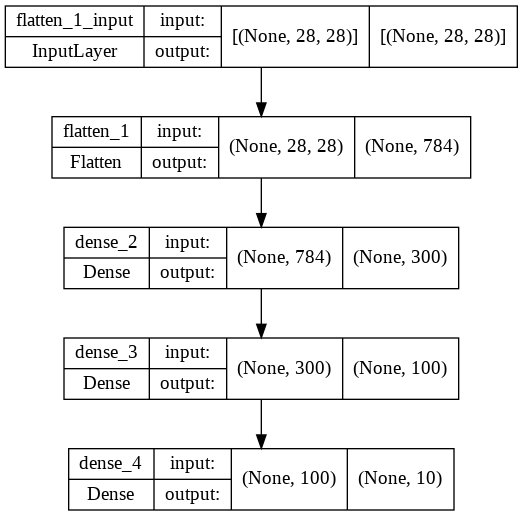

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Observa-se que a camada densa tem muitos parâmetros. A primeira oculta tem 784 x 300 coneções + 300 bias = 235500 parâmetros.

Depois do modelo ser criado, o próximo passo é compilar. Nesse caso é especificado a função de perda (loss), o otimizador e as métricas a serem calculadas durante o treinamento e avaliação.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

A função de perda/loss "sparse_categorical_crossentropy" é utilizada porque está sendo utilizado rótulos esparsos: para cada instância do problema existe apenas um índice de classe alvo, de 0-9, e essas classes são exclusivas. Se um vetor fosse utilizado para representar as classes, a função "categorical_crossentropy" seria a ideal. Já se a classificação fosse binária ou binária multilabel, a função de ativação seria a logística na camada de saída (ao invés da softmax) e a função de perda seria "binary_crossentropy".

Já o otimizador "sgd" indica que o treinamento será feito usando Gradiente Descendente Estocástico, ou seja, será realizado o algoritmo de _Backpropagation_ (utilizado nas seções anteriores).

Treinando e avaliando o modelo:

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7196 - accuracy: 0.7638 - val_loss: 0.5180 - val_accuracy: 0.8230
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4877 - accuracy: 0.8275 - val_loss: 0.4372 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4423 - accuracy: 0.8443 - val_loss: 0.5519 - val_accuracy: 0.7928
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4155 - accuracy: 0.8554 - val_loss: 0.3926 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3968 - accuracy: 0.8611 - val_loss: 0.3797 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3780 - accuracy: 0.8681 - val_loss: 0.3734 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3659 - accuracy: 0.8720 - val_loss: 0.3614 - val_accuracy:

A cada época, é calculada a função de perda e as métricas definidas anteriormente. Esses valores são ideais para verificar quão bem o modelo está indo. Se a performance do conjunto de treinamento é melhor que o conjunto de validação, o modelo tem mais chance de gerar overfitting no conjunto de treinamento. Observa-se que a perda do treinamento diminuiu e a acurácia da validação atingiu 89.02% após as 30 épocas. A acurácia do treinamento foi de 91.87%, bem próxima da de treinamento, não evidenciando muito overfitting.

Analisando as métricas graficamente durante cada época:

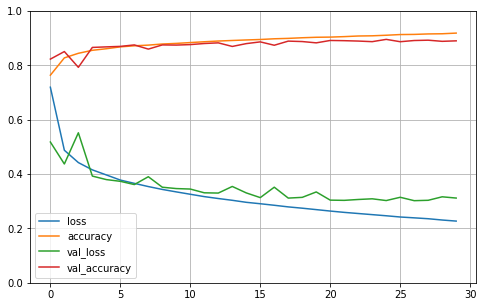

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

As validações aumentam durante as épocas, enquanto a perda diminui. Comparando as curvas de treinamento e validação, as curvas de validação estão próximas das curvas de treinamento, indicando que não existe muito overfitting. Durante o processo de treinamento (fit), o erro da validação é calculado no final de cada época, enquanto o erro de treinamento é calculado usando uma média de execução durante cada época. Isso explica as diferenças entre os dois pares de curvas. O desempenho do conjunto de treinamento acaba superando o desempenho da validação, algo que acontece quando o treinamento é feito por tempo suficiente. 

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8807


[0.33813512325286865, 0.8806999921798706]

Durante a avaliação é comum obter um desempenho um pouco menor no conjunto de teste que no conjunto de validação, já que os hiperparâmetros da rede foram ajustados no de validação e não no de teste.

Fazendo previsões com o modelo por meio de novos dados (aqui está sendo utilizado os três primeiros dados do conjunto de teste):

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Para a primeira imagem, obteve-se 96% de chance de pertencer à classe 9 (Ankle boot). Para a segunda, 98% de ser da classe 2 (Pullover). Para a última, 100% de ser Trouser (classe 1).

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

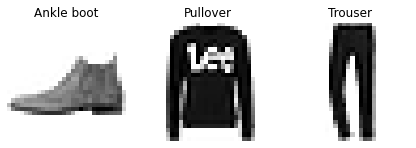

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Referência:

Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. Disponível em: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/.

# Rede neural convolucional para classificação de imagens

Esse último exemplo segue a ideia anterior: classificação de imagens. Entretanto, o conjunto de dados consiste em imagens coloridas de flores e é usada uma rede neural convolucional.

In [ ]:
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

Baixando e explorando o conjunto de dados: que consiste em 3670 fotos de flores pertencentes à 5 classes: daisy, dandelion, roses, sunflowers e tulips.

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Quantidade de imagens:', image_count)

Quantidade de imagens: 3670


Observando alguns exemplos de imagens:

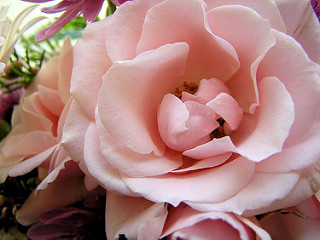

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[2]))

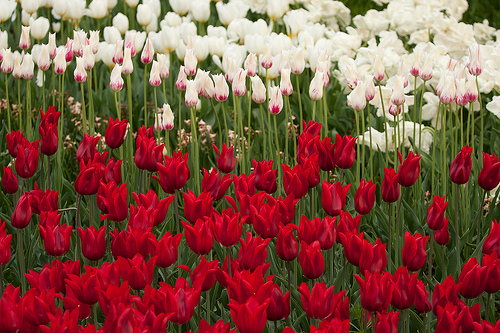

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

Passando as imagens para um data set que será utilizado no treinamento e classificação da rede:

Definindo o tamanho das imagens e o tamanho do lote (batch size - um termo que refere-se ao número de exemplos de treinamento usados em uma iteração).

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

De todo o conjunto de dados 80% serão utilizados para treinamento e 20% para validação.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Classes das flores envolvidas no problema:

In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Visualizando alguns dados:

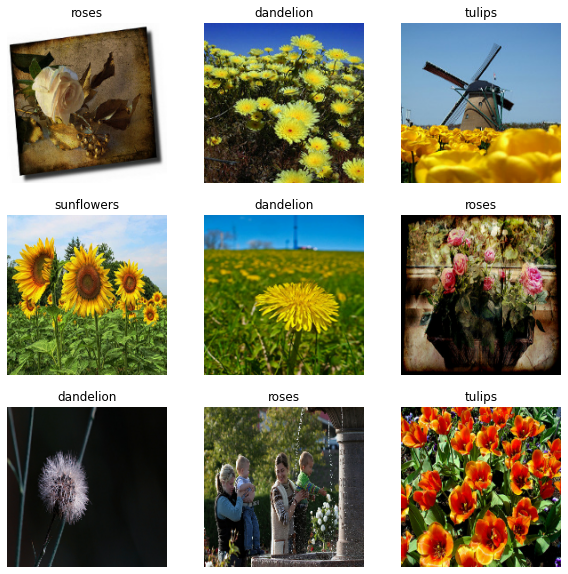

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Observa-se que image_batch é um tensor da forma (32, 180, 180, 3), ou seja, é um lote de 32 imagens de formato 180x180x3 (uma imagem colorida). O label_batch é um tensor da forma (32,), estes são os rótulos correspondentes às 32 imagens.

As linhas a seguir configuram o conjunto de dados para terem um melhor desempenho durante o treinamento, no que se refere à leitura do dados na memória:

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Criação do modelo:

In [ ]:
num_classes = len(class_names)

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Uma camada de aumento de dados é utilizada de modo a evitar overfitting (acontece quando existe um número pequeno de dados de treinamento, por exemplo). Essa camada gera dados de treinamento adicionais a partir dos exemplos já existentes. Tais dados são gerados por meio de transformações aleatórias que produzem outras imagens de aparência relevante. Esse processo expõem a rede/modelo a mais aspectos dos dados, aumentando a capacidade de generalização.

Assim como no exemplo anterior, as imagens encontram-se no intervalo [0, 255] e devem ser mapeadas para o intervalo [0, 1]. Para isso uma camada do ripo Rescaling é utilizada.

É acrescentado no modelo Sequential três blocos de convolução (Conv2D) com uma camada de agrupamento máximo (MaxPooling2D) em cada um deles. Há uma camada totalmente conectada (Dense) com 128 unidades em cima dela que é ativada por uma função de ativação ReLU ('relu').

A camada Dropout é responsável por buscar reduzir o overfitting da rede. Quando é utilizado esse tipo de regularização, a rede descarta aleatoriamente um número de unidades de saída da camada durante o processo de treinamento. O valor passado como parâmetro corresponde à porcentagem de unidades de saídas que serão descartadas aleatoriamente.

Compilando o modelo:

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

Observa-se, pela complexidade das imagens em relação às do exemplo anterior, que a quantidade de parâmetros é muito maior.

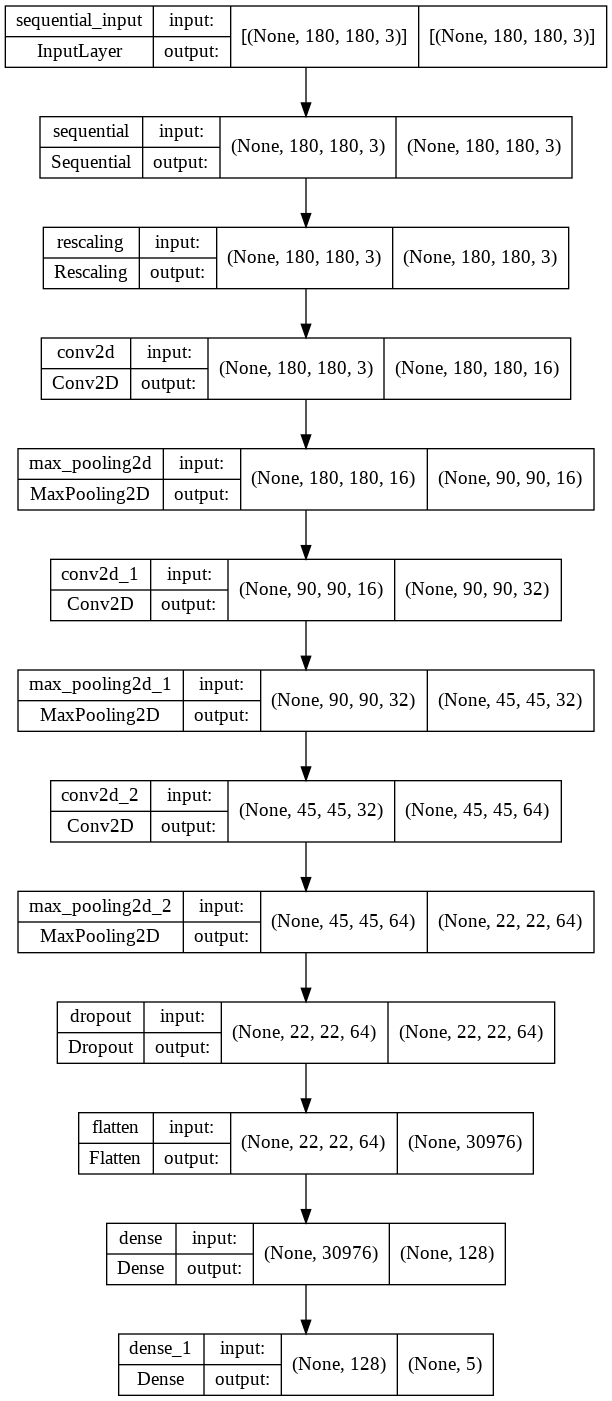

In [ ]:
keras.utils.plot_model(model, "flowers_model.png", show_shapes=True)

Treinamento do modelo:

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 112s 1s/step - loss: 1.2571 - accuracy: 0.4646 - val_loss: 1.1027 - val_accuracy: 0.5463
Epoch 2/15
92/92 [==============================] - 104s 1s/step - loss: 1.0053 - accuracy: 0.6155 - val_loss: 0.9648 - val_accuracy: 0.6362
Epoch 3/15
92/92 [==============================] - 103s 1s/step - loss: 0.8905 - accuracy: 0.6567 - val_loss: 1.0083 - val_accuracy: 0.6253
Epoch 4/15
92/92 [==============================] - 104s 1s/step - loss: 0.8643 - accuracy: 0.6703 - val_loss: 0.8746 - val_accuracy: 0.6676
Epoch 5/15
92/92 [==============================] - 105s 1s/step - loss: 0.8037 - accuracy: 0.6843 - val_loss: 0.7710 - val_accuracy: 0.6935
Epoch 6/15
92/92 [==============================] - 103s 1s/step - loss: 0.7400 - accuracy: 0.7166 - val_loss: 0.7530 - val_accuracy: 0.7153
Epoch 7/15
92/92 [==============================] - 103s 1s/step - loss: 0.6936 - accuracy: 0.7371 - val_loss: 0.7491 - val_accuracy: 0.7193
Epoch 8/15
92

Observa-se que, com 15 épocas de treinamento, a rede obteve uma acurácia de treinamento de 81.81% e 72.62% de validação. Visualizando esses dados de treinamento graficamente, temos:

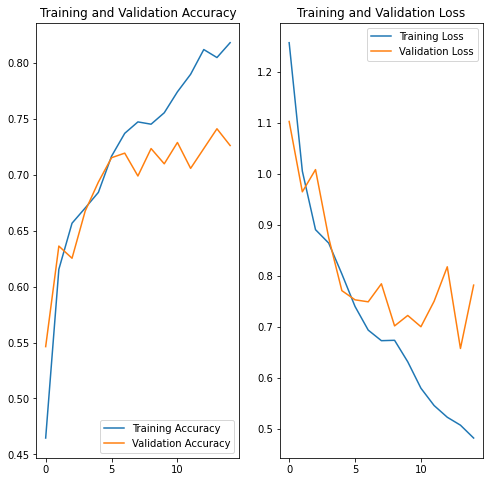

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 18))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Com o uso das estratégias descritas anteriormente, a ocorrência de overfitting foi menor.

Usando o modelo para classificar uma imagem não utilizada durante o treinamento:

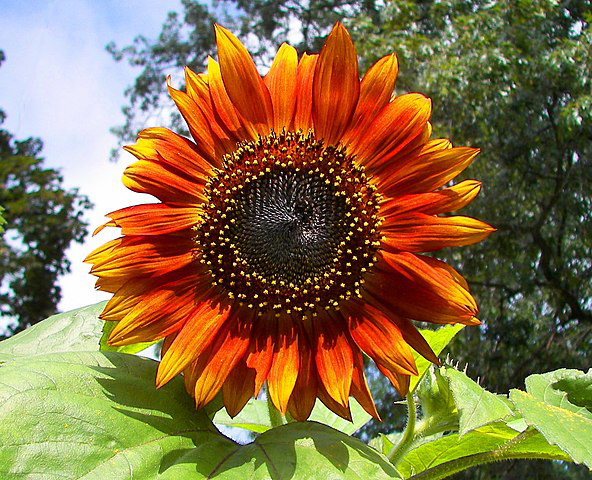

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
PIL.Image.open(sunflower_path)

In [ ]:
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('Classe:', class_names[np.argmax(score)])
print('Chance:', 100 * np.max(score))

Classe: sunflowers
Chance: 99.80705380439758


Referência

Classificação de imagem - Tensorflow. Disponível em: https://www.tensorflow.org/tutorials/images/classification.